Projek untuk menganalisa dan melakukan prediksi terhadap dataset Penyakit Paru-Paru

Disusun oleh Zaki Ahmad Basyary

Dataset : Kaggle (https://www.kaggle.com/datasets/andot03bsrc/dataset-predic-terkena-penyakit-paruparu/data)

In [1]:
#Melakukan install library yang digunakan

!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


MELAKUIKAN IMPORT LIBRARY YANG AKAN DIGUNAKAN

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

MELAKUKAN PANGAMBILAN DATASET

In [11]:
data = pd.read_csv('predic_tabel.csv')

In [12]:
data.head(10)

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
5,6,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak
6,7,Tua,Wanita,Pasif,Tidak,Ya,Tidak,Sering,Tidak,Tidak,Ya
7,8,Muda,Pria,Aktif,Tidak,Ya,Ya,Sering,Tidak,Tidak,Tidak
8,9,Tua,Wanita,Aktif,Ya,Ya,Ya,Jarang,Ada,Ada,Ya
9,10,Muda,Wanita,Pasif,Ya,Tidak,Ya,Jarang,Ada,Ada,Ya


In [13]:
data.tail(10)

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
29990,29991,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29991,29992,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak
29992,29993,Tua,Wanita,Pasif,Tidak,Ya,Tidak,Sering,Tidak,Tidak,Ya
29993,29994,Muda,Wanita,Pasif,Ya,Tidak,Ya,Sering,Tidak,Ada,Ya
29994,29995,Muda,Wanita,Pasif,Ya,Tidak,Ya,Jarang,Ada,Ada,Ya
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak
29999,30000,Tua,Wanita,Pasif,Tidak,Ya,Tidak,Sering,Tidak,Tidak,Ya


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [15]:
#MENGHAPUS KOLOM NOMOR
data.drop('No', axis=1, inplace=True)

In [16]:
#MENGECEK DATA YANG HILANG ATAU KOSONG
data.isnull().sum()

Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil                 0
dtype: int64

In [17]:
#MELIHAT NILAI-NILAI YANG ADA PADA SETIAP KOLOM

frekuensi_usia = data['Usia'].value_counts()
frekuensi_JKelamin = data['Jenis_Kelamin'].value_counts()
frekuensi_Merokok = data['Merokok'].value_counts()
frekuensi_Bekerja = data['Bekerja'].value_counts()
frekuensi_RumahTangga = data['Rumah_Tangga'].value_counts()
frekuensi_Begadang = data['Aktivitas_Begadang'].value_counts()
frekuensi_Olahraga = data['Aktivitas_Olahraga'].value_counts()
frekuensi_Asuransi = data['Asuransi'].value_counts()
frekuensi_PenyakitBawaan = data['Penyakit_Bawaan'].value_counts()
frekuensi_Hasil = data['Hasil'].value_counts()


print("FREKUENSI NILAI DARI SETIAP KOLOM \n")
print("Frekuensi nilai dari kolom Usia", frekuensi_usia)
print("Frekuensi nilai dari kolom Jenis Kelamin", frekuensi_JKelamin)
print("Frekuensi nilai dari kolom Merokok", frekuensi_Merokok)
print("Frekuensi nilai dari kolom Bekerja", frekuensi_Bekerja)
print("Frekuensi nilai dari kolom Rumah Tangga", frekuensi_RumahTangga)
print("Frekuensi nilai dari kolom Aktivitas Begadang", frekuensi_Begadang)
print("Frekuensi nilai dari kolom Aktivitas Olahraga", frekuensi_Olahraga)
print("Frekuensi nilai dari kolom Asuransi", frekuensi_Asuransi)
print("Frekuensi nilai dari kolom Penyakit Bawaan ", frekuensi_PenyakitBawaan)
print("Frekuensi nilai dari kolom Hasil ", frekuensi_Hasil)



FREKUENSI NILAI DARI SETIAP KOLOM 

Frekuensi nilai dari kolom Usia Usia
Muda    15383
Tua     14617
Name: count, dtype: int64
Frekuensi nilai dari kolom Jenis Kelamin Jenis_Kelamin
Wanita    22225
Pria       7775
Name: count, dtype: int64
Frekuensi nilai dari kolom Merokok Merokok
Aktif    15210
Pasif    14790
Name: count, dtype: int64
Frekuensi nilai dari kolom Bekerja Bekerja
Ya       18964
Tidak    11036
Name: count, dtype: int64
Frekuensi nilai dari kolom Rumah Tangga Rumah_Tangga
Ya       15425
Tidak    14575
Name: count, dtype: int64
Frekuensi nilai dari kolom Aktivitas Begadang Aktivitas_Begadang
Ya       17548
Tidak    12452
Name: count, dtype: int64
Frekuensi nilai dari kolom Aktivitas Olahraga Aktivitas_Olahraga
Jarang    17994
Sering    12006
Name: count, dtype: int64
Frekuensi nilai dari kolom Asuransi Asuransi
Ada      21239
Tidak     8761
Name: count, dtype: int64
Frekuensi nilai dari kolom Penyakit Bawaan  Penyakit_Bawaan
Ada      19350
Tidak    10650
Name: count, dtype

MELAKUKAN VISUALISASI

C:\Users\Asus\AppData\Local\Temp\ipykernel_14292\1607580151.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data, x=col, palette='viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_14292\1607580151.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data, x=col, palette='viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_14292\1607580151.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data, x=col, palette='viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_14292\1607580151.py:8: FutureWarning: 

Pa

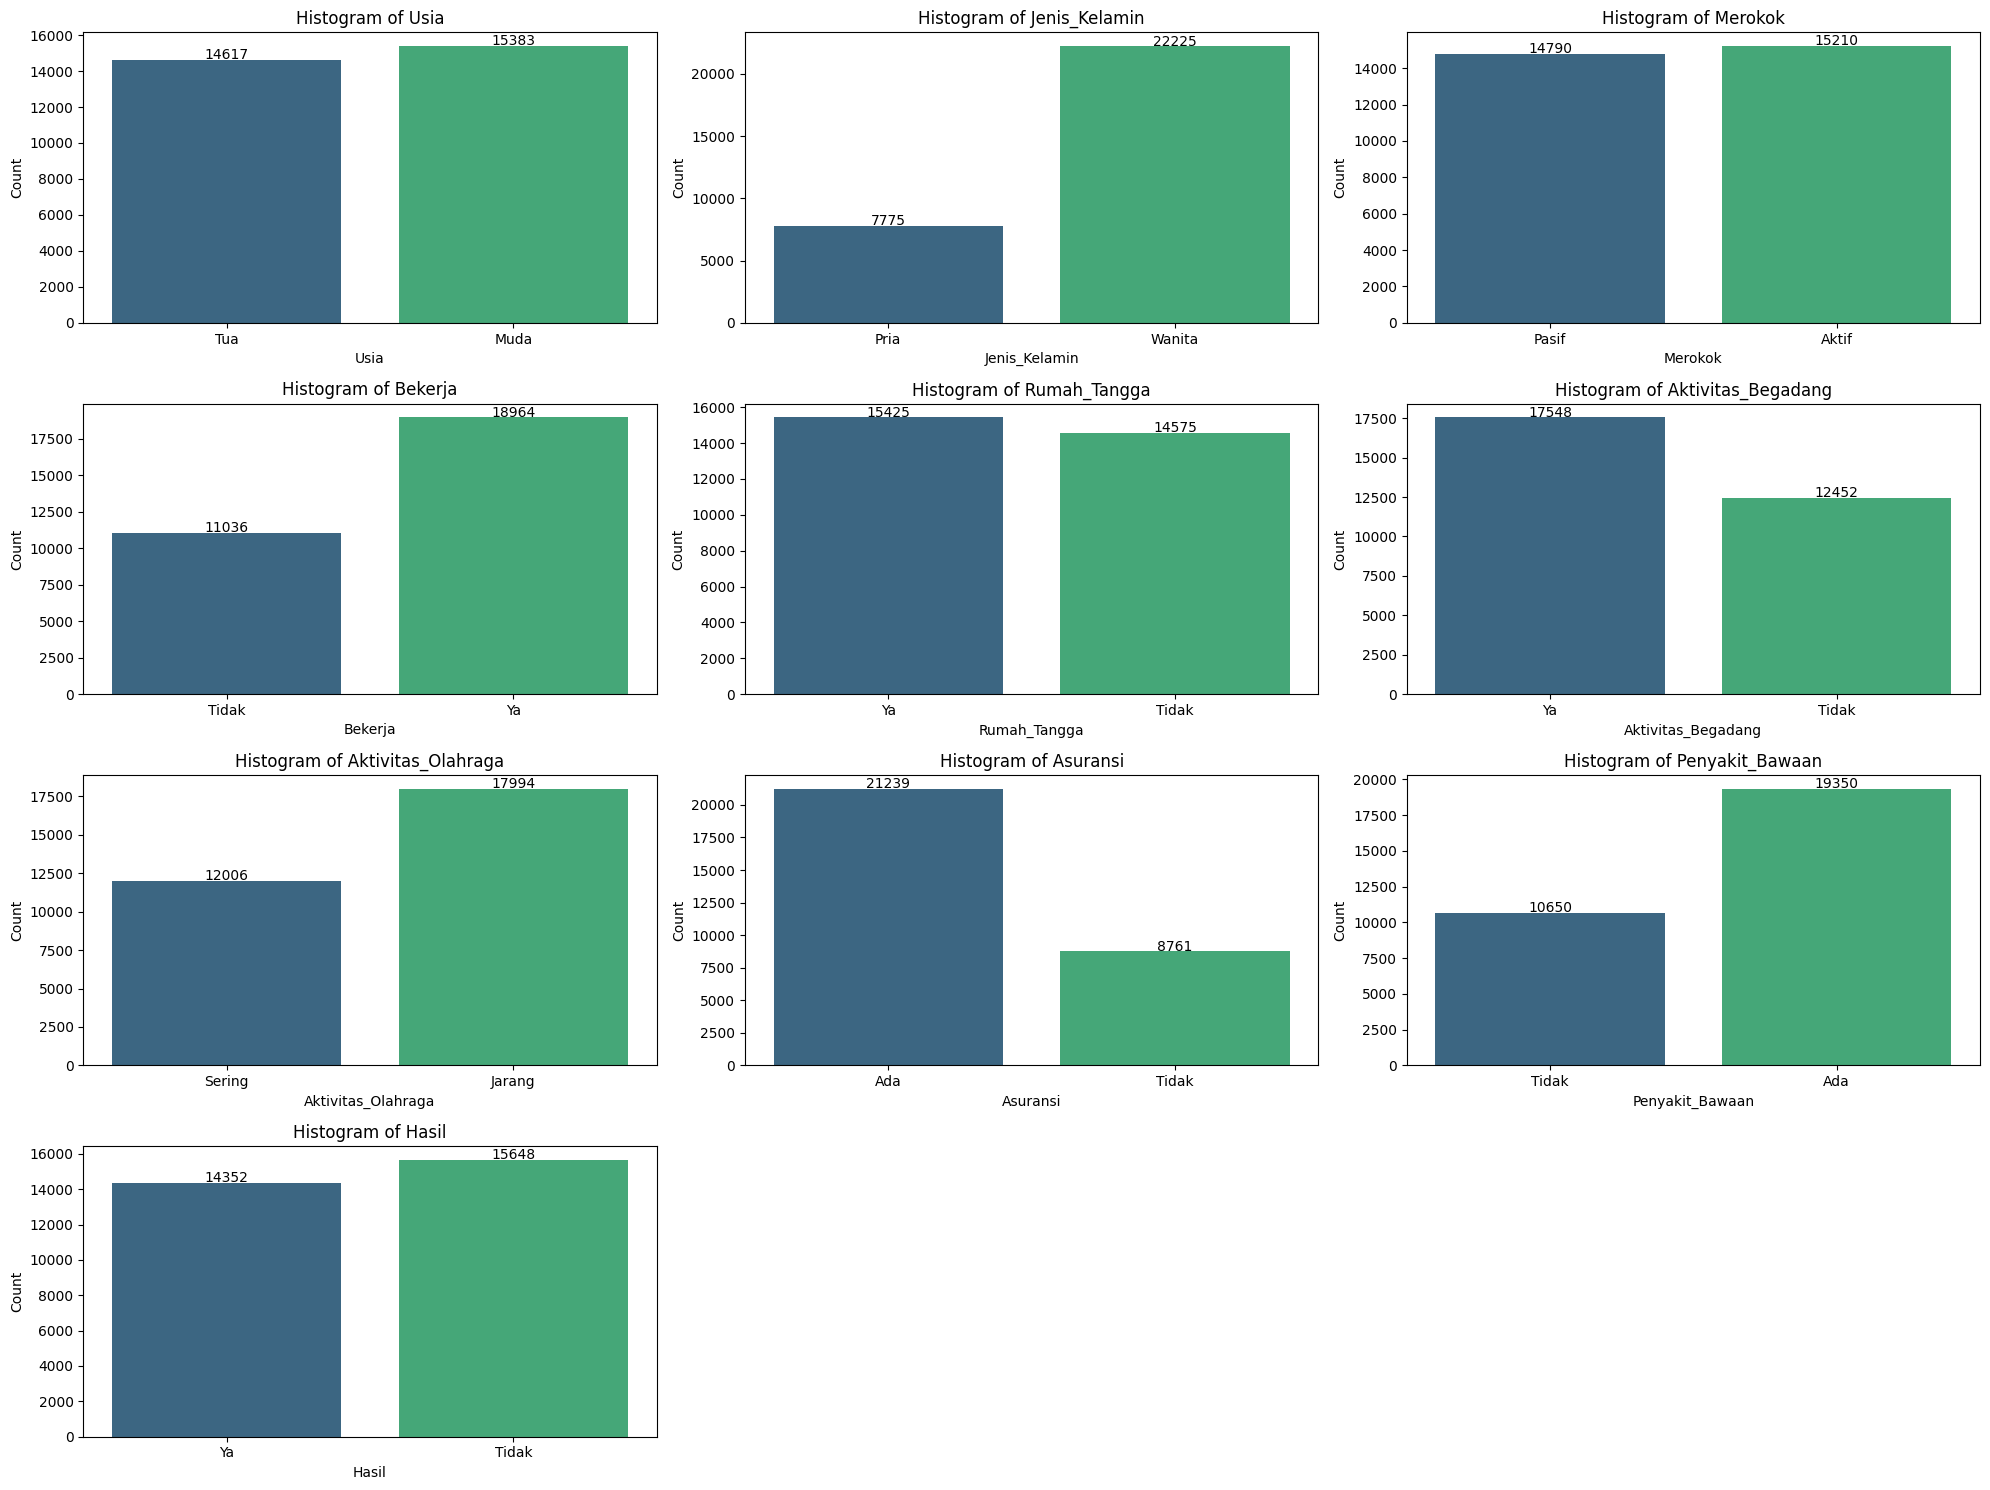

In [18]:
columns_to_visualize = ['Usia','Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga', 'Aktivitas_Begadang', 
                        'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil']

plt.figure(figsize=(20, 15))

for i, col in enumerate(columns_to_visualize):
    plt.subplot(4, 3, i + 1)  
    ax=sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{int(height)}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
data_encoded= data.copy()
columns_to_encode = ['Usia','Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga', 'Aktivitas_Begadang', 
                     'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil']


# Apply LabelEncoder to each column
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le


In [15]:
for col, le in label_encoders.items():
    print(f"\nMapping for column '{col}':")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for category, number in mapping.items():
        print(f"{category}: {number}")


Mapping for column 'Usia':
Muda: 0
Tua: 1

Mapping for column 'Jenis_Kelamin':
Pria: 0
Wanita: 1

Mapping for column 'Merokok':
Aktif: 0
Pasif: 1

Mapping for column 'Bekerja':
Tidak: 0
Ya: 1

Mapping for column 'Rumah_Tangga':
Tidak: 0
Ya: 1

Mapping for column 'Aktivitas_Begadang':
Tidak: 0
Ya: 1

Mapping for column 'Aktivitas_Olahraga':
Jarang: 0
Sering: 1

Mapping for column 'Asuransi':
Ada: 0
Tidak: 1

Mapping for column 'Penyakit_Bawaan':
Ada: 0
Tidak: 1

Mapping for column 'Hasil':
Tidak: 0
Ya: 1


MEMBUAT GRAFIK ATAU DIGARAM HEATMAP YANG DIGUNAKAN UNTUK MENUNJUKKAN KORELASI ANTAR KOLOM

Correlation: Korelasi digunakan untuk memahami hubungan antara dua variabel, yang bisa membantu dalam analisis data dan pengambilan keputusan.

1. Positive Correlation, Ketika dua variabel bergerak dalam arah yang sama. Jika satu variabel meningkat, variabel lainnya juga meningkat, dan jika satu variabel menurun, variabel lainnya juga menurun. Korelasi positif sempurna adalah +1.
2. Negative Correlation. Ketika dua variabel bergerak dalam arah yang berlawanan. Jika satu variabel meningkat, variabel lainnya menurun, dan sebaliknya. Korelasi negatif sempurna adalah -1.
3. Zero Correlation,Tidak ada hubungan linear antara dua variabel. Perubahan dalam satu variabel tidak berhubungan dengan perubahan dalam variabel lainnya.

In [12]:
correlation = data_encoded.corr()

<Axes: >

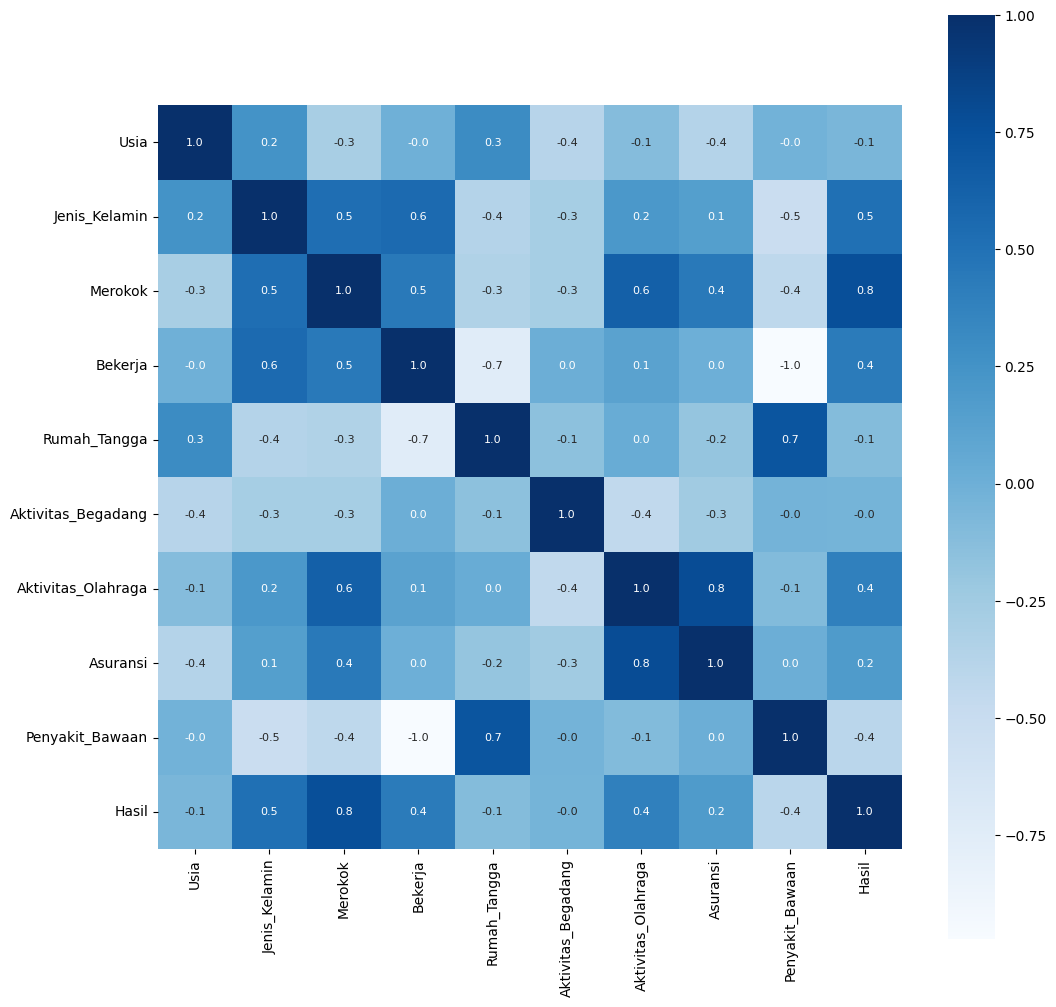

In [13]:
# Dibuat diagram heatmap
plt.figure(figsize = (12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

MENUNJUKKAN HUBUNGAN ANTAR KOLOM YANG MEMILIKI KORELASI YANG CUKUP KUAT

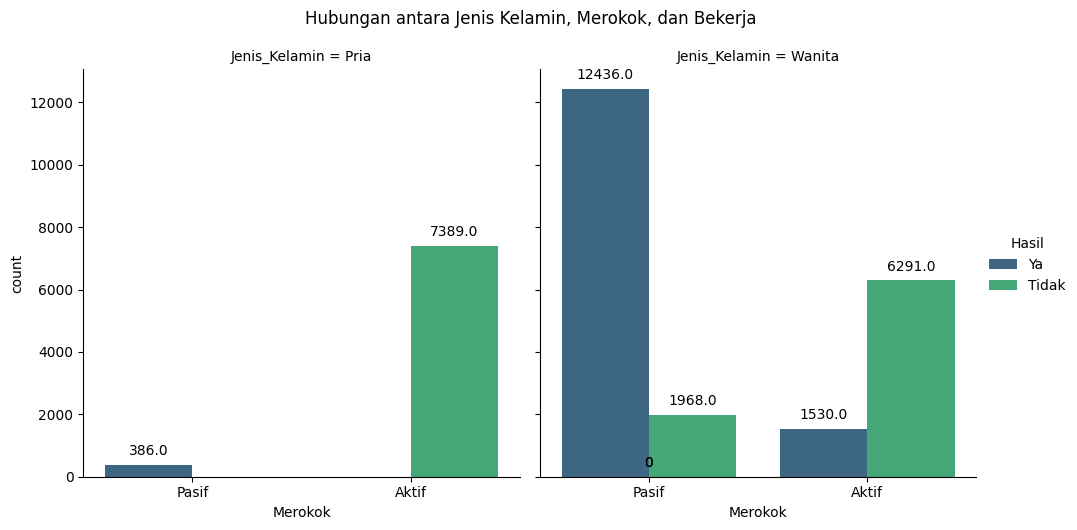

In [14]:
g = sns.catplot(data=data, kind='count', x='Merokok', hue='Hasil', col='Jenis_Kelamin', palette='viridis')

# Menambahkan judul
g.fig.suptitle('Hubungan antara Jenis Kelamin, Merokok, dan Bekerja', y=1.05)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan plot
plt.show()

MELAKUKAN PROSES SPLIT DATA UNTUK DATA TRAIN DAN DATA TEST

In [20]:
X = data_encoded.drop(['Hasil'],axis=1)
Y = data_encoded['Hasil']

In [16]:
X.head(10)

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan
0,1,0,1,0,1,1,1,0,1
1,1,0,0,0,1,1,0,0,0
2,0,0,0,0,1,1,0,0,1
3,1,0,0,1,0,0,0,0,0
4,0,1,1,1,0,0,1,1,0
5,0,1,1,1,0,0,1,1,0
6,1,1,1,0,1,0,1,1,1
7,0,0,0,0,1,1,1,1,1
8,1,1,0,1,1,1,0,0,0
9,0,1,1,1,0,1,0,0,0


In [21]:
Y.head()

0    1
1    0
2    0
3    0
4    1
Name: Hasil, dtype: int32

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

MENGGUNAKAN METODE RANDOM FOREST

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# melatih model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
# prediksi dari data yang sudah ada
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[0.4486231 1.        0.        ... 0.        0.        0.       ]


NILAI EROR DARI MODEL

In [27]:
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.882682507626853


MELAKUKAN PERCOBAAN MODEL DENGAN DATA YANG DIINPUTKAN SENDIRI

In [28]:
def input_binary(nilai):
    while True:
        try:
            value = int(input(nilai))
            if value in [0, 1]:
                return value
            else:
                print("Input harus 0 atau 1. Coba lagi.")
        except ValueError:
            print("Input tidak valid. Masukkan angka 0 atau 1.")

print("Masukkan nilai untuk setiap kolom data (isi dengan 0 atau 1)")
usia = input_binary("Usia (Muda:0, Tua:1): ")
JKelamin = input_binary("Jenis Kelamin (Pria:0, Wanita:1): ")
rokok= input_binary("Merokok (Aktif:0, Pasif:1): ")
kerja= input_binary("Bekerja (Tidak:0, Iya:1): ")
Rumah_tangga= input_binary("Berumah Tangga (Tidak:0, Iya:1): ")
begadang= input_binary("Aktivitas Begadang (Tidak:0, Iya:1): ")
olahraga= input_binary("Aktivitas Olahraga (Jarang:0, Sering:1): ")
Asuransi= input_binary("Asuransi (Ada:0, Tidak:1): ")
penyakit_bawaan= input_binary("Penyakit Bawaan (Ada:0, Tidak:1): ")

input_data = [[usia, JKelamin, rokok, kerja, Rumah_tangga, begadang, olahraga, Asuransi, penyakit_bawaan]]

prediksi= regressor.predict(input_data)

print(prediksi)
if  prediksi >= 0.5 and prediksi <=1:
    print("Hasil : Mengalami Penyakit Paru-Paru")
elif prediksi >= 0 and prediksi <0.5:
    print("Hasil : Tidak Mengalami Penyakit Paru-Paru")
else:
    print("Model eror")


Masukkan nilai untuk setiap kolom data (isi dengan 0 atau 1)
[1.]
Hasil : Mengalami Penyakit Paru-Paru


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
